In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.layers import Input
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
import tqdm as tqdm
df = pd.read_json('train.json')
test = pd.read_json('test.json')

In [4]:
df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg'], dtype='object')

In [8]:
df['inc_angle'].value_counts()

na         133
34.4721     23
42.5591     16
33.6352     15
36.1061     15
39.234      13
39.2166     11
39.9784     11
38.4755     11
45.2814     11
34.4709     10
42.559      10
45.2859     10
40.7118      9
38.4591      9
39.2325      9
37.6877      9
35.7863      9
34.4718      9
40.7129      9
38.0736      8
37.6866      8
35.2957      8
42.5644      7
36.9034      7
40.3904      7
38.8594      7
43.2611      7
43.9459      6
37.2802      6
          ... 
45.2311      1
37.338       1
43.9847      1
41.2023      1
39.6097      1
41.1289      1
43.951       1
36.6134      1
36.5189      1
37.3669      1
43.7797      1
41.1402      1
31.3701      1
45.2541      1
38.85        1
34.0458      1
31.3954      1
45.2652      1
39.6484      1
34.0352      1
41.8505      1
35.7409      1
43.9933      1
31.5507      1
30.4373      1
24.7546      1
40.3085      1
37.1941      1
40.3416      1
35.7139      1
Name: inc_angle, Length: 879, dtype: int64

In [15]:
df.describe()

,is_iceberg
count,1604.000000
mean,0.469451
std,0.499222
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 62.7+ KB
None


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [28]:
df['inc_angle'].replace('na', 0, inplace = True)

In [29]:
df.isnull().sum()

band_1        0
band_2        0
id            0
inc_angle     0
is_iceberg    0
dtype: int64

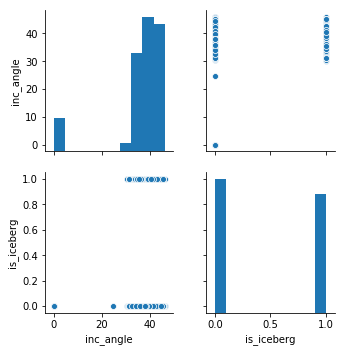

In [31]:
sns.pairplot(df)

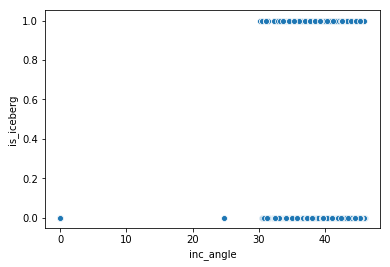

In [36]:
sns.scatterplot(y = df.is_iceberg, x = df.inc_angle, data  = df)